# Coding Section

* Note: If these libraries are not available in your system, please install them by removing them as a comment

In [1]:
# Installing necessary libraries for parsing and scraping of data
# pip install beautifulsoup4

In [2]:
# # Installing library needed to grab data from yahoo finance
# pip install yfinance

## Part 1: Scan/Parse

In [3]:
# Importing Libraries for Parsing
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
# Providing url which will be used to grab data
url= 'https://www.prnewswire.com/news-releases/financial-services-latest-news/investment-opinions-list/?page=1&pagesize=25'
# Storing the data of website
response = requests.get(url)

# Parsing using beautiful soup
soup = BeautifulSoup(response.text, 'html.parser')
# Testing by printing title
print(soup.title)

<title>All Investments Opinions News and Press Releases from PR Newswire</title>


## Part 2: Track/Store/Search

### Part 2.1: Track

In [5]:
# Creating a empty list which will be used to store articles
articles = []

# For loop to grab data of each article in the webpage
for a in soup.findAll('a',href=True, attrs={'class':"newsreleaseconsolidatelink display-outline"}):
    if a.img: # if loop to parse through and grab info for one article at a time
        title = a.img['title'] # Title of article
        summary = a.find('p', attrs={"class":"remove-outline"}) # Summary of article stored in 'p' tag
        # Storing title and summary in dictionary
        article_dict = {
        'title': title ,
        'summary': summary.text
        }
    
    # Appending dictionary to empty list    
        articles.append(article_dict)

### Part 2.2: Store

In [6]:
# Creating a dataframe of above list
df = pd.DataFrame(articles) 
df.head(15)

,title,summary
0,"Thinking About Buying UFO Gaming, Avalanche, E...",InvestorsObserver issues critical Crypto Alert...
1,Thinking about trading options or stock in AT&...,InvestorsObserver issues critical PriceWatch A...
2,"Thinking about buying stock in Kaixin Auto, St...",InvestorsObserver issues critical PriceWatch A...
3,"Thinking about buying stock in KE Holdings, Am...",InvestorsObserver issues critical PriceWatch A...
4,Thinking about trading options or stock in App...,InvestorsObserver issues critical PriceWatch A...
5,Thinking about trading options or stock in Tes...,InvestorsObserver issues critical PriceWatch A...
6,"Thinking about buying stock in Canoo, Cidara T...",InvestorsObserver issues critical PriceWatch A...
7,"Thinking about buying stock in FREYR Battery, ...",InvestorsObserver issues critical PriceWatch A...
8,"Thinking About Buying King DAG, All Sports, On...",InvestorsObserver issues critical Crypto Alert...
9,Thinking about buying stock in Luminar Technol...,InvestorsObserver issues critical PriceWatch A...


#Getting a List of Real Stock Codes to Validate the Extracted Stock Codes (Source: Yahoo)

* Note: Please change the directory of excel file, execl file is available in submitted zip file

In [7]:
# Loading a excel file which consist of all stock codes available in the world, Yahoo Finance
ticker_symbols_list = pd.read_excel(r"E:\Ai development\Yahoo_Ticker_Symbols.xlsx", sheet_name = "Stock", skiprows = range(1, 3), header=[1])
#ticker_symbols_list.head()

In [8]:
# This excel file contains numerous records and every column is not required
ticker_symbols_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106328 entries, 0 to 106327
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         106328 non-null  object 
 1   Name           96676 non-null   object 
 2   Exchange       95092 non-null   object 
 3   Category Name  20728 non-null   object 
 4   Country        95091 non-null   object 
 5   Unnamed: 5     0 non-null       float64
 6   Unnamed: 6     0 non-null       float64
 7   Unnamed: 7     8 non-null       object 
dtypes: float64(2), object(6)
memory usage: 6.5+ MB


In [9]:
# Creating a new dataframe which consist only ticker column which have names of stock, and we are limiting it to 5K.
ts = ticker_symbols_list['Ticker'].loc[:5000]

## Part 2.3: Search

In [10]:
# Extracting Stock Codes using Regex from the dataframe which contains articles of website

# importing library of regular expresion
import re

# Creating empty list which will used to store stock symbols
ticker_syms = []

# Using regex we are finding all uppercase words which contains more than 2 letters because all the stock codes are in 
# uppercase in the article

# For loop to go through each entry in dataframe
for i in range(len(df)):
    # storing the words directly into our list
    ticker_syms = ticker_syms + re.findall(r'\b[A-Z]{2,}\b', df.iloc[i]['title']) # finding all letters using regex in title
    ticker_syms = ticker_syms + re.findall(r'\b[A-Z]{2,}\b', df.iloc[i]['summary']) # finding all letters using regex in summary
   
 # Removing duplicates, by converting into set
ticker_syms = list(set(ticker_syms))

# printing to check the stock codes
print('Stock Codes ', ticker_syms)

Stock Codes  ['ADBE', 'TSLA', 'DOMA', 'AMD', 'KE', 'ATAI', 'CALT', 'VIR', 'SOC', 'BLOC', 'XCUR', 'RBLX', 'CDTX', 'BCTX', 'TABOO', 'LLY', 'MESO', 'PFE', 'CNC', 'NVDA', 'OREO', 'KXIN', 'AVCT', 'PTPI', 'OOKS', 'FREYR', 'SEAC', 'BILI', 'GRTX', 'CLF', 'AT', 'FREY', 'SNAX', 'ETH', 'AAPL', 'PLUG', 'ORE', 'PULM', 'AVAX', 'LAC', 'QUALCOMM', 'ACN', 'MDT', 'BLU', 'ROKU', 'ENSC', 'NOK', 'GME', 'RELI', 'NVIDIA', 'AMC', 'OCGN', 'UFO', 'DAG', 'JNJ', 'MSFT', 'BB', 'GOEV', 'NIO', 'KDAG', 'ADGI', 'BELLUS', 'QCOM', 'BEKE', 'GMTX', 'DAL', 'PBTS', 'LOW', 'LAZR', 'ALZN', 'LESL', 'PETS', 'BABA']


In [11]:
# Problem faces using regex is sometime we are getting names which are not stock codes
# We are getting rid of the words that are not stock codes

# Empty list which will only contain stock codes
actual_ticker_syms = []

# Loop to parse thorugh each value
for ticker in ticker_syms:
    # if loop to compare each value of the list which contains stock code from website with the dataframe which have all the 
    # stock codes of yahoo finance
    if ticker in ts.values:
        actual_ticker_syms.append(ticker) # if value matches then it is stored in new list


# Printing all the valid stock codes
print('Stock codes which are validated from Yahoo Stock Codes document:', actual_ticker_syms) 

Stock codes which are validated from Yahoo Stock Codes document: ['ADBE', 'AMD', 'ATAI', 'CDTX', 'LLY', 'CNC', 'NVDA', 'CLF', 'AT', 'ETH', 'AAPL', 'ACN', 'NOK', 'GME', 'AMC', 'MSFT', 'DAL', 'LOW', 'BABA']


# Part 3: Retrieving Data, Yahoo Finance

In [12]:
# Importig library for yahoo finance
import yfinance as yf

In [13]:
# # For loop to parse through each value of stock from the stock list
# # Creating a empty list whoch will store info of codes
# info= []
# # for loop to parse each stock code and retrieve thier info
# for code in actual_ticker_syms:
# #     Ticker function used to grab info of that stock
#     ticker = yf.Ticker(code)
#     # storing this information, but limiting it to only code name, sector, industry and company name
#     info1 = {'Stock Code':code, 'Sector': ticker.info['sector'], 'Industry': ticker.info['industry'], 'Company Name': ticker.info['longName']}
#     # appending this info to empty list
#     info.append(info1)


In [14]:
# For loop to parse through each value of stock from the stock list
# Creating a empty list whoch will store info of codes
info= []

# Try,except and finally to catch error which doesn't affect the code, this is a way to ignore it.
try:
# for loop to parse each stock code and retrieve thier info
    for code in actual_ticker_syms:
        # Ticker function used to grab info of that stock
        ticker = yf.Ticker(code)
        # storing this information, but limiting it to only code name, sector, industry and company name
        info1 = {'Stock Code':code, 'Sector': ticker.info['sector'], 'Industry': ticker.info['industry'], 'Company Name': ticker.info['longName']}
        # appending this info to empty list
        info.append(info1)
except KeyError: 
    print("Output")
finally:
    pass

Output


In [15]:
# Converting list into Dataframe
df = pd.DataFrame (info, columns = ['Stock Code','Sector','Industry','Company Name'])

In [16]:
# Checking Dataframe to know more
df

,Stock Code,Sector,Industry,Company Name
0,ADBE,Technology,Software—Infrastructure,Adobe Inc.
1,AMD,Technology,Semiconductors,"Advanced Micro Devices, Inc."
2,ATAI,Healthcare,Biotechnology,Atai Life Sciences N.V.
3,CDTX,Healthcare,Biotechnology,"Cidara Therapeutics, Inc."
4,LLY,Healthcare,Drug Manufacturers—General,Eli Lilly and Company
5,CNC,Healthcare,Healthcare Plans,Centene Corporation
6,NVDA,Technology,Semiconductors,NVIDIA Corporation
7,CLF,Basic Materials,Steel,Cleveland-Cliffs Inc.


## Part 4: Visualizations

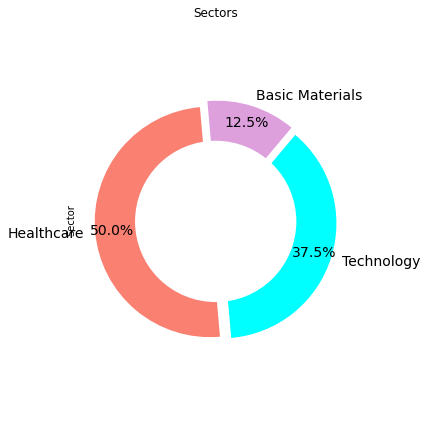

In [17]:
# Visualizing donut chart to check the sectors of each stock code 

# Importing library for visualization
import matplotlib.pyplot as plt

# Variable for sector of each code and counting each value
sectors = df['Sector'].value_counts()

 # To resolve explode problem which we have mentioned during presentation
for_explode = sectors.count() # Counting the total sectors
i=0 # defining variable i 
list_explode = []  # Empty list to store value
while i < for_explode:  # while loop to iterate for each sector
    a = 0.05 # value for explode
    list_explode.append(a) # appending value of explode for each sector
    i+=1 # increasing value if i by 1
explode = tuple(list_explode) # converting list into tuple so that it can bes used in plotting

# Colors
colors = ['salmon','cyan','plum']

# Plotting pie chart # i=outer cirlce
sectors.plot.pie(autopct='%1.1f%%',colors = colors,title="Sectors", startangle=95,explode = explode,pctdistance=0.85, figsize=(6,6),fontsize=14, legend=False)

# inner circle for donut 
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Defining axis for both circles as equal
plt.axis('equal')  
plt.tight_layout() # not to overlap
plt.show()

It is possible that selected industry is not available in parsed data, if that is the case. Please change the industry in the next two block of code, sector == 'change industry name' . This can happen when the parses articles doesn't have any article of that sector. 

Output


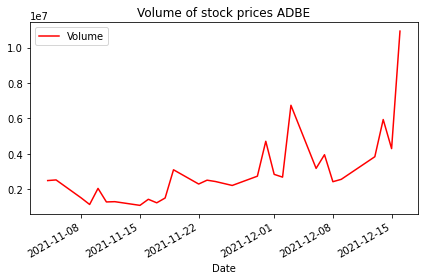

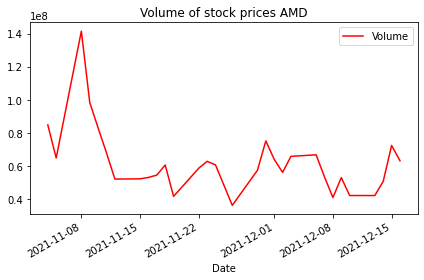

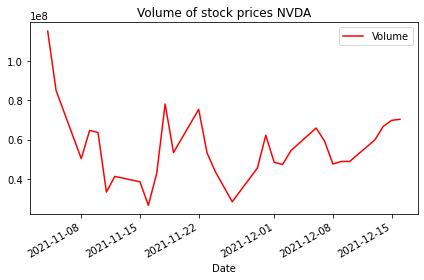

In [18]:
# For loop to parse through each value of stock from the stock list
# Try,except and finally to catch error which doesn't affect the code, this is a way to ignore it.
try:
    for code in actual_ticker_syms:
        ticker = yf.Ticker(code)
    # Choosing the sector
        if ticker.info['sector']=='Technology':   ## Change here if required
        # Grabbing the information of each stock for past 30 days
            data1 = ticker.history(period="30D")
        # Plotting the line chart, of volume of stock
            data1[['Volume']].plot(title="Volume of stock prices "+ code,legend=True,color=['r'])
            plt.tight_layout()
except KeyError:
    print("Output")
finally:
    pass

Output


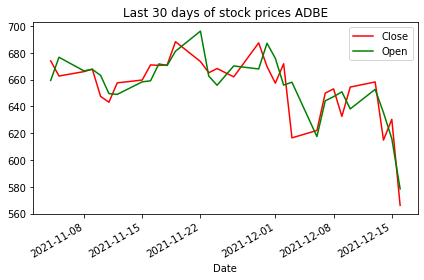

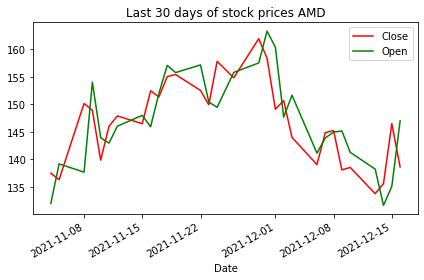

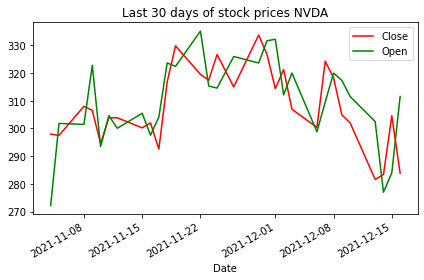

In [19]:
# For loop to parse through each value of stock from the stock list
# Try,except and finally to catch error which doesn't affect the code, this is a way to ignore it.
try:
    for code in actual_ticker_syms:
        ticker = yf.Ticker(code)
    # Selecting the sector
        if ticker.info['sector']=='Technology':  ## change here if required 
        # Selecting the period of data= 30 Days
            data2 = ticker.history(period="30D")
        # Plotting the chart of open and close values of stock
            data2[['Close','Open']].plot(title="Last 30 days of stock prices "+ code,legend=True,color=['r','g'])
            plt.tight_layout()
except KeyError:
    print("Output")
finally:
    pass

GitHub Link: https://github.com/dheerajsavanthy/AIDI_1100_INTRODUCTION_TO_AI_FINAL_PROJECT